The objective of this file is to delete the areas that are not needed, assemble others and plot the result.

In [1]:
#import the necessary libraries
import pandas
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

In [ ]:
#Import the dataframe with the samples
areas=pandas.read_csv('resultado_final_muestras.csv')

#We print the areas



FileNotFoundError: [Errno 2] No such file or directory: 'resultado_final_muestras.csv'

In [ ]:
#We print the areas
areas

,decimalLatitude,decimalLongitude,depth,genusid,fecha_hora,OBJECTID,filo,muestra,observaciones
0,-82.375000,-168.625000,597.0,115484.0,1978-12-14,47.0,2,0,9
1,-82.375000,-168.625000,597.0,104204.0,1978-12-14,47.0,2,0,9
2,-82.375000,-168.625000,597.0,104246.0,1978-12-14,47.0,2,0,9
3,-82.375000,-168.625000,597.0,115484.0,1978-12-14,47.0,2,0,9
4,-82.375000,-168.625000,597.0,104246.0,1978-12-14,47.0,2,0,9
...,...,...,...,...,...,...,...,...,...
7522773,89.599998,112.133301,750.0,196874.0,1972-06-09,65.0,2,896546,4
7522774,89.699997,151.199997,3500.0,104178.0,1972-06-24,65.0,2,896547,1
7522775,89.983300,84.745000,0.0,127608.0,1991-08-06,65.0,2,896548,3
7522776,89.983300,84.745000,0.0,127632.0,1991-08-06,65.0,2,896548,3


In [ ]:
#We drop the areas that don't have a point in our model
areas = areas.drop(
    areas[areas['OBJECTID'].isin([51,24,11,23])].index
)

In [ ]:
#We select the samples corresponding to the areas we want to merge
areas[areas['OBJECTID'].isin([48,49,56,57,55,64,65,2,58,30,27,38,41])]

,decimalLatitude,decimalLongitude,depth,genusid,fecha_hora,OBJECTID,filo,muestra,observaciones
121176,-38.250000,117.950000,NaN,137850.0,1991-07-09,48.0,3,36649,2
121177,-38.250000,117.950000,NaN,341438.0,1991-07-09,48.0,3,36649,2
125207,-37.500000,114.500000,100.0,117199.0,1965-02-26,48.0,1,38266,5
125208,-37.500000,114.500000,100.0,117200.0,1965-02-26,48.0,1,38266,5
125209,-37.500000,114.500000,100.0,138092.0,1965-02-26,48.0,3,38266,5
...,...,...,...,...,...,...,...,...,...
7522773,89.599998,112.133301,750.0,196874.0,1972-06-09,65.0,2,896546,4
7522774,89.699997,151.199997,3500.0,104178.0,1972-06-24,65.0,2,896547,1
7522775,89.983300,84.745000,0.0,127608.0,1991-08-06,65.0,2,896548,3
7522776,89.983300,84.745000,0.0,127632.0,1991-08-06,65.0,2,896548,3


In [ ]:
#To merge them, we replace the OBJECTID of the areas we want to merge, by selecting just one of them
areas["OBJECTID"] = areas["OBJECTID"].replace({49:48, 57:56, 55:56, 65:64, 58:2, 30:27, 41:38})

In [ ]:
#Now, we select the columns we want to keep
areas=areas[["fecha_hora","genusid","muestra", "observaciones","OBJECTID"]]

In [ ]:
#We create a new column with the year of the sample
areas['año'] = pandas.to_datetime(areas['fecha_hora']).dt.year

In [10]:
areas

,fecha_hora,genusid,muestra,observaciones,OBJECTID,año
0,1978-12-14,115484.0,0,9,47.0,1978
1,1978-12-14,104204.0,0,9,47.0,1978
2,1978-12-14,104246.0,0,9,47.0,1978
3,1978-12-14,115484.0,0,9,47.0,1978
4,1978-12-14,104246.0,0,9,47.0,1978
...,...,...,...,...,...,...
7522773,1972-06-09,196874.0,896546,4,64.0,1972
7522774,1972-06-24,104178.0,896547,1,64.0,1972
7522775,1991-08-06,127608.0,896548,3,64.0,1991
7522776,1991-08-06,127632.0,896548,3,64.0,1991


In [ ]:
#We save this information in a new csv file
areas.to_csv('areas_bootstrap_anyo.csv', index=False)

We have a new .csv file without the eliminated areas, and the areas that we want to merge are together.
Now, we have to create a dataframe with the number of samples, observations and genus in each area

In [ ]:
#We create the column 'num_muestra' with the number of samples for each OBJECTID
num_muestra = areas.groupby('OBJECTID')['muestra'].nunique()

In [19]:
#We create the column 'num_genero' with the number of different genera for each OBJECTID
num_genero=areas.groupby('OBJECTID')['genusid'].nunique()

In [21]:
#We create the column 'num_observaciones' with the number of different observations for each OBJECTID
areas['num_observaciones'] = areas.groupby('OBJECTID')['OBJECTID'].transform('count')
#We select the first value of the column 'num_observaciones' for each OBJECTID, it is the same for all the rows of the same OBJECTID
num_obs = areas.groupby('OBJECTID')['num_observaciones'].first().reset_index()

In [ ]:
#Now, we merge the three columns we created with the original dataframe
resultado = pandas.merge(num_genero, num_muestra, on='OBJECTID')
resultado = resultado.merge(num_obs, on='OBJECTID')

In [ ]:
#We save the new dataframe in a csv file
resultado.to_csv('numero_generos_muestras_observaciones_nuevo.csv', sep=',', index=False)

In [ ]:
#We read the csv file to check the result
resultado=pandas.read_csv('numero_generos_muestras_observaciones_nuevo.csv', sep=',')

In [3]:
resultado

,OBJECTID,genusid,muestra,num_observaciones
0,1.0,439,55577,727283
1,2.0,131,305,587
2,3.0,1299,158505,1231679
3,4.0,1022,15937,142239
4,5.0,514,38783,251942
5,6.0,1700,156793,1351870
6,7.0,240,622,3220
7,8.0,132,336,2588
8,9.0,585,123724,645376
9,10.0,1506,34203,98212


We charge the shapefile to merge the areas there. We have done the following steps for each combination of areas, it is represented just one, but it is the same for the others

In [ ]:
# Load shapefile
shapefile = gpd.read_file(r'C:\Users\glode\OneDrive\Desktop\doctorado\filtrado_obis\lme66.shp')
shapefile = shapefile.set_crs(epsg=4326)

In [45]:
#Select the rows that we want to merge
gdf_selected = shapefile[shapefile['OBJECTID'].isin([48,49])]

In [46]:
gdf_selected

,OBJECTID,LME_NUMBER,LME_NAME,Shape_Leng,Shape_Area,geometry
47,48,43.0,South West Australian Shelf,86.091782,100.611490,"POLYGON ((138.09537 -35.62258, 138.09575 -35.6..."
48,49,44.0,West Central Australian Shelf,46.156425,53.201921,"POLYGON ((113.7121 -22.49985, 113.7019 -22.508..."


In [47]:
#We merge the geometries of the selected rows
merged_geometry = gdf_selected.unary_union

C:\Users\glode\AppData\Local\Temp\ipykernel_11244\3829551429.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geometry = gdf_selected.unary_union


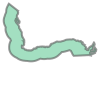

In [48]:
#We plot the merged geometry to see if it is correct
merged_geometry

In [49]:
#We copy the data of the selected row to a new row
new_row = shapefile[shapefile['OBJECTID'] == 48].copy()

In [50]:
#We include hear the geometry of the new row
new_row.iloc[0, new_row.columns.get_loc('geometry')]= merged_geometry

In [ ]:
#We see if it is done correctly
new_row

,OBJECTID,LME_NUMBER,LME_NAME,Shape_Leng,Shape_Area,geometry
47,48,43.0,South West Australian Shelf,86.091782,100.61149,"POLYGON ((138.09575 -35.62505, 138.10313 -35.6..."


In [ ]:
#We insert the new row in the shapefile
shapefile[shapefile['OBJECTID'] == 48]= new_row

Save the shapefile with the changes

In [78]:
shapefile.to_file("nuevas_areas.shp")

In [79]:
#We merge the dataframe of the genera, 'muesta', observations with the shapefile
shapefile_combined = shapefile.merge(resultado, left_on='OBJECTID', right_on='OBJECTID', how='right')

In [ ]:
#We check if we have done it correctly
shapefile_combined.head(5)

,OBJECTID_x,LME_NUMBER_x,LME_NAME,Shape_Leng_x,Shape_Area_x,geometry_x,genusid,muestra,num_observaciones
0,1,23.0,Baltic Sea,219.326402,61.950021,"POLYGON ((10.97944 54.38055, 10.98611 54.37805...",439,55577,727283
1,2,52.0,Sea of Okhotsk,145.932989,213.796584,"MULTIPOLYGON (((156.62592 51.16026, 156.30289 ...",131,305,587
2,3,22.0,North Sea,209.486403,103.965247,"POLYGON ((5.27889 61.98027, 5.24917 61.97388, ...",1299,158505,1231679
3,4,2.0,Gulf of Alaska,468.695688,203.793868,"POLYGON ((-124.59823 47.90313, -125.85582 47.0...",1022,15937,142239
4,5,9.0,Labrador - Newfoundland,270.847479,114.597691,"MULTIPOLYGON (((-64.56793 60.45509, -60.09442 ...",514,38783,251942


We create the map for observations and 'muestra'

In [30]:
shapefile_combined['geometry']=shapefile_combined['geometry_x']

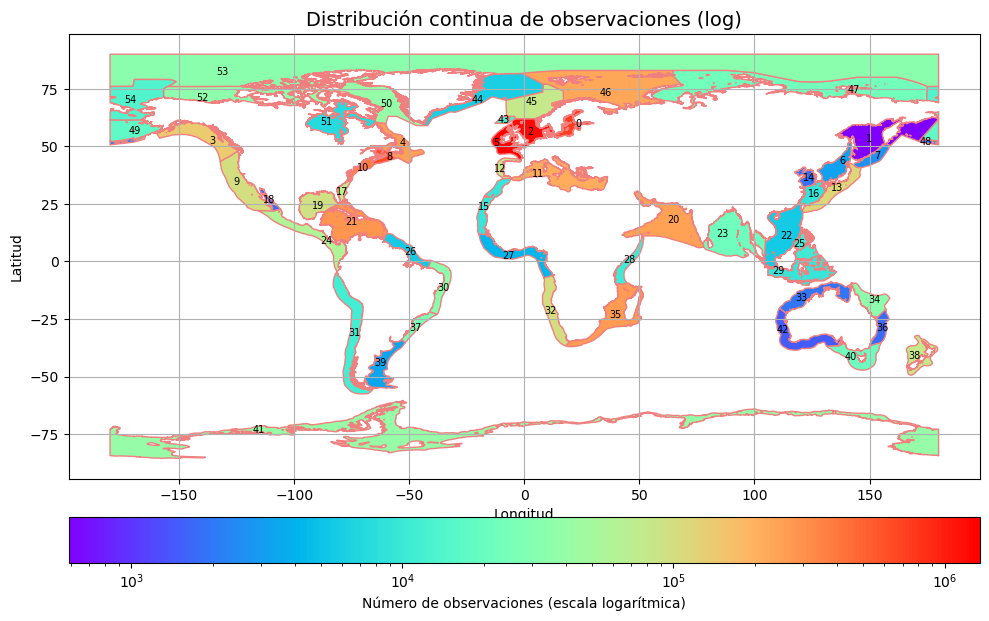

In [32]:
# Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 8))

# Obtener los valores originales (sin transformar)
values = shapefile_combined['num_observaciones']

# Crear colormap con LogNorm
norm = LogNorm(vmin=values[values > 0].min(), vmax=values.max())  # evitar log(0)
cmap = plt.cm.rainbow

# Graficar manualmente con colores logarítmicos
shapefile_combined.plot(
    ax=ax,
    color=[cmap(norm(val)) if val > 0 else (1,1,1,0) for val in values],  # asignar color a cada polígono
    edgecolor='lightcoral',
)

# Crear barra de color (colorbar)
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label("Número de observaciones (escala logarítmica)")

# Agregar etiquetas OBJECTID
for idx, row in shapefile_combined.iterrows():
    pt = row.geometry.representative_point()
    ax.text(pt.x, pt.y, str(row['OBJECTID_y']), fontsize=7, ha='center', va='center', color='black')

# Título y ejes
ax.set_title("Distribución continua de observaciones (log)", fontsize=14)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.grid(True)

plt.tight_layout()
plt.show()


We create the map for genera

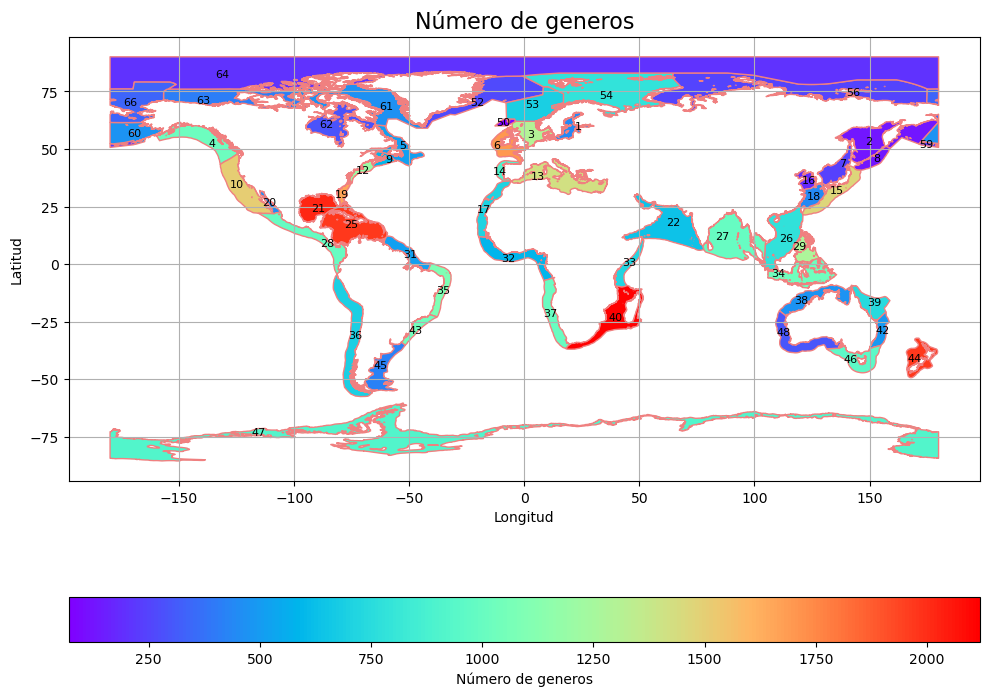

In [ ]:
# Crear figura y eje para el mapa
fig, ax = plt.subplots(figsize=(10, 8))



# Colorear las regiones según el valor de 'genusid'
shapefile_combined.plot(column='genusid', ax=ax, legend=True,
              legend_kwds={'label': "Número de generos",
                           'orientation': "horizontal"},
              cmap='rainbow',  # Escala de colores (puedes cambiarla)
              edgecolor='lightcoral')

# Agregar etiquetas en puntos representativos dentro de cada polígono
for idx, row in shapefile_combined.iterrows():
    # Obtener un punto representativo dentro del polígono
    representative_point = row.geometry.representative_point()
    
    # Agregar etiqueta en ese punto
    ax.text(representative_point.x, representative_point.y, 
            str(row["OBJECTID"]),  # Aquí estamos usando 'OBJECTID'
            fontsize=8, ha='center', va='center', color='black')

# Título y etiquetas
ax.set_title("Número de generos", fontsize=16)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Now that we have the map, we need to create a histogram with the number of areas that have each sample

In [124]:
#Cuantas filas hay que sobrepasan 60000
shapefile_combined[["LME_NAME","muestra","OBJECTID"]][shapefile_combined['muestra'] > 60000]

,LME_NAME,muestra,OBJECTID
2,North Sea,158505,3
5,Celtic-Biscay Shelf,156793,6
8,Scotian Shelf,123724,9


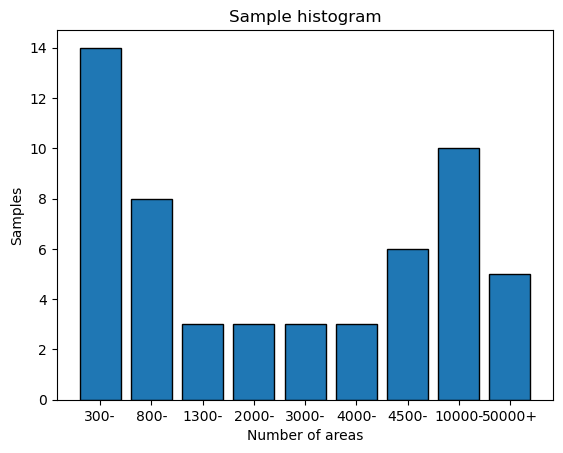

In [68]:
umbral = 50000

# Agrupar edades mayores al umbral como '50+'
shapefile_combined['muestras_mod'] = shapefile_combined['muestra'].apply(lambda x: f"{umbral}+" if x > umbral else x)

# Contar frecuencias
conteo = shapefile_combined['muestras_mod'].value_counts().sort_index(key=lambda x: [int(str(val).replace('+', '')) for val in x])


# Definir los intervalos personalizados (bins)
bins = [300, 800, 1300, 2000, 3000, 4000, 4500, 10000, 50000, float('inf')]
labels = ['300-', '800-', '1300-', '2000-', '3000-', '4000-', '4500-', '10000-', '50000+']

# Cortar los datos en intervalos
shapefile_combined['muestras_intervalo'] = pandas.cut(shapefile_combined['muestra'], bins=bins, labels=labels, right=True)

conteo = shapefile_combined['muestras_intervalo'].value_counts().sort_index()


# Crear el histograma modificado
plt.bar(conteo.index.astype(str), conteo.values, edgecolor='black')
plt.title('Sample histogram')
plt.xlabel('Number of areas')
plt.ylabel('Samples')
plt.show()

This is optionally, we have created a new shapefile with the index of the OBJECTID changed. In the first one, there are OBJECTID that miss some numbers, in the second one we have OBJECTID from 0 to the total number of areas

In [20]:
# Cargar shapefile
shapefile1 = gpd.read_file(r'C:\Users\glode\OneDrive\Desktop\doctorado\filtrado_obis\nuevas_areas.shp')
shapefile1 = shapefile1.set_crs(epsg=4326)
shapefile2=gpd.read_file(r'C:\Users\glode\OneDrive\Desktop\doctorado\filtrado_obis\nuevas_areas_index.shp')
shapefile2 = shapefile2.set_crs(epsg=4326)


In [6]:
shapefile2.head(1)

,OBJECTID,LME_NUMBER,LME_NAME,Shape_Leng,Shape_Area,geometry
0,0,23.0,Baltic Sea,219.326402,61.950021,"POLYGON ((10.97944 54.38055, 10.98611 54.37805..."


In [ ]:
#We combine both OBJECTID
shapefile_combined=shapefile_combined.merge(shapefile2, left_on='LME_NAME', right_on='LME_NAME', how='right')

In [ ]:
#We drop the columns of the first OBJECTID, the ones that are repeated
shapefile_combined=shapefile_combined.drop(columns=['OBJECTID_x','LME_NUMBER_y','Shape_Leng_y','Shape_Area_y','geometry_y'])

In [ ]:
shapefile_combined = shapefile1.merge(resultado, left_on='OBJECTID', right_on='OBJECTID', how='right')

In [ ]:
shapefile_combined.head(11)